## Air Qlality Index usning Randomforest regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


<AxesSubplot:>

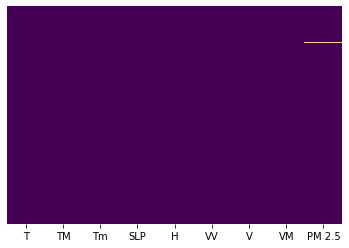

In [3]:
#checking for the null valuse using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [4]:
#removethe null valuses 
df= df.dropna()

<AxesSubplot:>

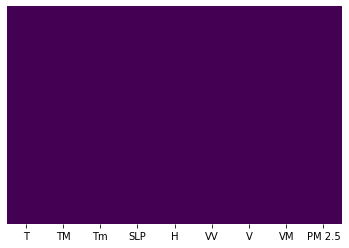

In [5]:
#checking for the null valuse using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
#checking for the null valuse using heatmap
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df.corr()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
T,1.000000,0.967536,0.953719,-0.881409,-0.509299,0.640792,0.301994,0.287738,-0.631462
TM,0.967536,1.000000,0.892031,-0.822958,-0.586681,0.606945,0.292949,0.297011,-0.568409
Tm,0.953719,0.892031,1.000000,-0.917518,-0.287357,0.577240,0.296225,0.266782,-0.673824
SLP,-0.881409,-0.822958,-0.917518,1.000000,0.240256,-0.517915,-0.329838,-0.310704,0.623187
H,-0.509299,-0.586681,-0.287357,0.240256,1.000000,-0.465374,-0.380575,-0.362177,0.138005
VV,0.640792,0.606945,0.577240,-0.517915,-0.465374,1.000000,0.376873,0.342442,-0.573941
V,0.301994,0.292949,0.296225,-0.329838,-0.380575,0.376873,1.000000,0.775655,-0.268530
VM,0.287738,0.297011,0.266782,-0.310704,-0.362177,0.342442,0.775655,1.000000,-0.215854
PM 2.5,-0.631462,-0.568409,-0.673824,0.623187,0.138005,-0.573941,-0.268530,-0.215854,1.000000


<AxesSubplot:>

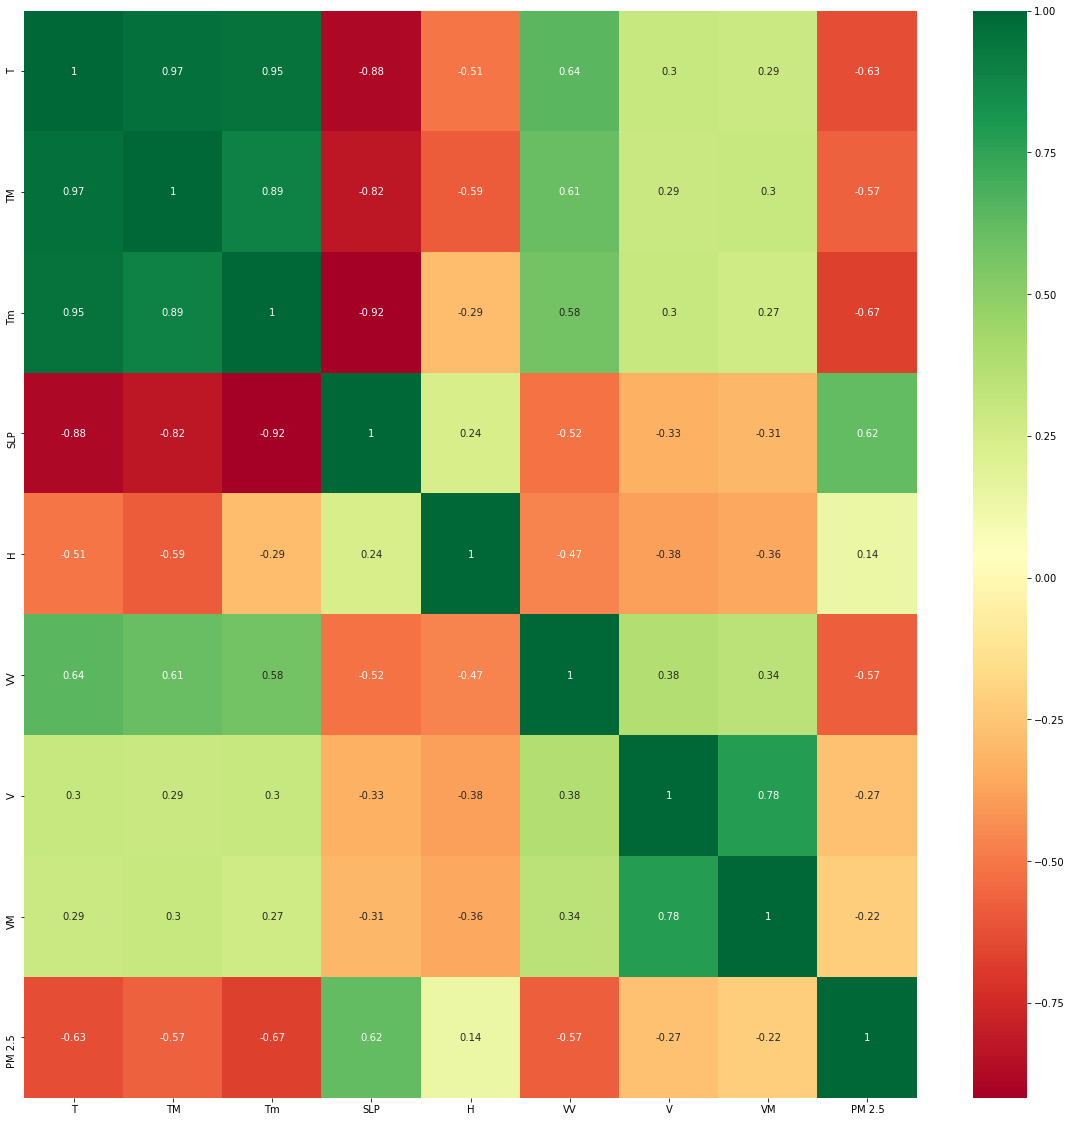

In [8]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [9]:
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [10]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [11]:
print(model.feature_importances_)

[0.17125864 0.08931004 0.21459804 0.14857222 0.08922465 0.1913606
 0.05291059 0.04276522]


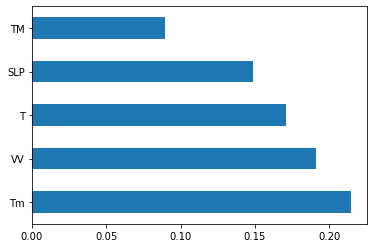

In [12]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

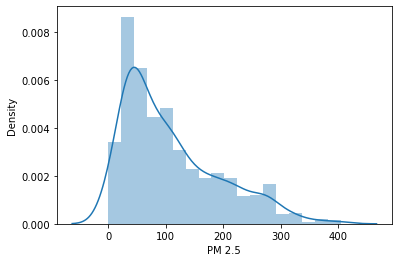

In [13]:
sns.distplot(y)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)


### Random forest regressor 


In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
regressor = RandomForestRegressor()

In [19]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [20]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9741016366716809


In [21]:
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on test set: 0.7934052609788396


In [22]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(regressor,X,y,cv=5)

In [23]:
score.mean()

0.7310830232218676

### Model Evaluation

In [24]:
prediction = regressor.predict(X_test)

C:\Users\1mura\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

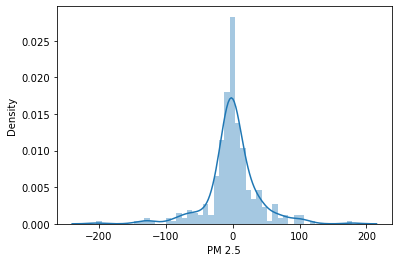

In [25]:
sns.distplot(y_test-prediction)

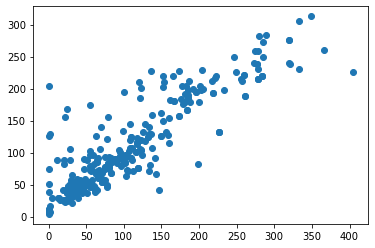

In [26]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning

In [27]:
# importing the randmizedsearch
from sklearn.model_selection import RandomizedSearchCV

In [28]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [29]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
# bootstrap = [True, False]

In [30]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [31]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [32]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=43)

In [33]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   1.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   2.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_esti

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   0.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=700; total time=   1.5s
[CV] END max_depth=20, max_features=a

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1200; total time=   2.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   2.5s
[CV] END max_depth=25, max_featu

[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=300; total time=   0.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   2.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=2, n_estimators=900; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=800; total time=   2.7s
[CV] END max_depth=15, max_features=s

[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   2.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=600; total time=   1.7s
[CV] END max_depth=10, max_featu

[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=600; total time=   1.3s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.6s
[CV] END max_depth=30, max_feature

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=700; total time=   1.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   2.4s
[CV] END max_depth=25, max_features

[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=500; total time=   1.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   1.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   1.5s
[CV] END max_depth=25, max

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=43, scoring='neg_mean_squared_error',
                   verbose=2)

In [34]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 30}

In [35]:
rf_random.best_score_

-1537.4887630692922

In [36]:
predictions=rf_random.predict(X_test)

<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

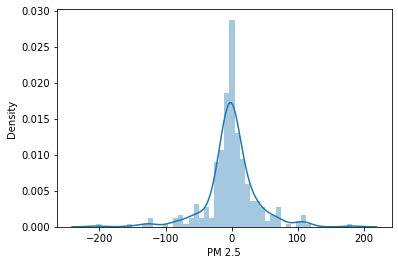

In [38]:
sns.distplot(y_test-predictions)

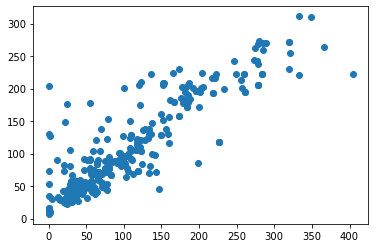

In [39]:
plt.scatter(y_test,predictions)

In [40]:
from sklearn import metrics

In [41]:
print(metrics.mean_absolute_error(y_test,predictions))

23.77816370257452


In [42]:
print(metrics.mean_squared_error(y_test,predictions))

1499.960114023547


In [45]:
print("RMSE:{}".format(np.sqrt(metrics.mean_squared_error(y_test,predictions))))

RMSE:38.72931853290924


In [46]:
import pickle

In [47]:
# open a file, where you ant to store the data
file = open('random_forest_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)